In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 57 kB 4.2 MB/s 
     |████████████████████████████████| 84 kB 871 kB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 275 kB 36.3 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 212 kB 35.7 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 36.1 MB/s 
     |████████████████████████████████| 2.3 MB 34.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 7.1 MB/s 
     |████████████████████████████████| 68 kB 4.5 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 594 kB 25.7 MB/s 
     |████████████████████████████████| 856 kB 10.

In [ ]:
import numpy as np
import pandas as pd 
import random

import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import gradio
import gradio as gr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


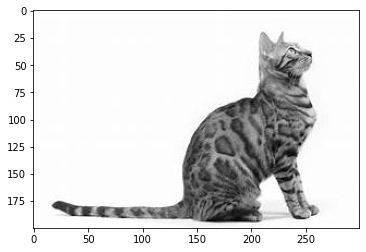

The image shape is (200, 300)


In [ ]:
DATADIR = os.path.abspath(os.getcwd()) + '/drive/My Drive/Colab Notebooks/raw-img/'
path = os.path.join(DATADIR,'gatto' )  
first_img_path = os.listdir(path)[0]
img_array = cv2.imread(os.path.join(path, first_img_path), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap = "gray")
plt.show()
#show image shape
print('The image shape is {}'.format(img_array.shape))

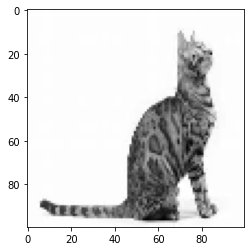

The image shape is (100, 100)


In [ ]:
IMG_SIZE=100

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

print('The image shape is {}'.format(new_array.shape))

In [ ]:
data = []
CATEGORIES= ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo"]


def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)    #path to cats or dogs dir    
        class_num = CATEGORIES.index(category)    #assign class label
        
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

                data.append([new_array, class_num])
            except Exception as e:
                pass
create_data()
print('There are {} total images'.format(len(data)))


There are 26179 total images


In [ ]:
random.shuffle(data)

#separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [ ]:
first_feature = X[0]
# plt.imshow(first_feature, cmap = 'gray')
print('The image shape is {}'.format(first_feature.shape))

The image shape is (100, 100, 1)


In [ ]:
X.shape

(26179, 100, 100, 1)

In [ ]:
X = X/255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('the shape of training features is {}'.format(X_train.shape))
print('the shape of training labels is {}'.format(y_train.shape))

print('the shape of test features is {}'.format(X_test.shape))
print('the shape of test labels is {}'.format(y_test.shape))

the shape of training features is (18325, 100, 100, 1)
the shape of training labels is (18325,)
the shape of test features is (7854, 100, 100, 1)
the shape of test labels is (7854,)


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

#output layer
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1) ])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])


In [ ]:
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
history = model.fit(X_train, y_train , epochs=11, validation_split=0.3)

Epoch 1/11
401/401 [==============================] - 389s 965ms/step - loss: 1.9847 - accuracy: 0.3026 - val_loss: 1.6997 - val_accuracy: 0.4147
Epoch 2/11
401/401 [==============================] - 389s 969ms/step - loss: 1.5581 - accuracy: 0.4643 - val_loss: 1.4746 - val_accuracy: 0.4929
Epoch 3/11
401/401 [==============================] - 382s 953ms/step - loss: 1.3360 - accuracy: 0.5451 - val_loss: 1.3605 - val_accuracy: 0.5393
Epoch 4/11
401/401 [==============================] - 390s 972ms/step - loss: 1.1603 - accuracy: 0.6107 - val_loss: 1.2601 - val_accuracy: 0.5748
Epoch 5/11
401/401 [==============================] - 381s 951ms/step - loss: 1.0234 - accuracy: 0.6487 - val_loss: 1.2596 - val_accuracy: 0.5798
Epoch 6/11
401/401 [==============================] - 382s 952ms/step - loss: 0.8926 - accuracy: 0.6942 - val_loss: 1.2264 - val_accuracy: 0.5942
Epoch 7/11
401/401 [==============================] - 382s 954ms/step - loss: 0.7697 - accuracy: 0.7386 - val_loss: 1.2856 -

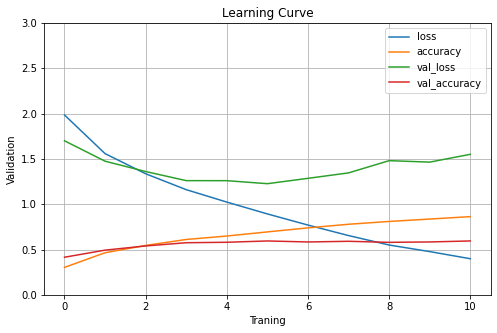

In [ ]:
#show learning curves
#mean training loss and accuracy measured over each epoch
#mean validation loss and accuracy measured at the end of each epochpd.DataFrame(history.history).plot(figsize=(8,5))
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,3) # set the vertical range to [0-1]
plt.xlabel('Traning')
plt.ylabel('Validation')
plt.title('Learning Curve')
plt.show()

In [ ]:
hist = history.history
#save model
model.save(os.path.abspath(os.getcwd()))

#save history
np.save('my_history.npy',hist)

In [ ]:
model = keras.models.load_model(os.path.abspath(os.getcwd()))

#load history
hist=np.load('my_history.npy',allow_pickle='TRUE').item()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [ ]:
y_proba=model.predict(X_test)
y_proba.round(2)

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.17, 0.  , 0.01, ..., 0.19, 0.61, 0.  ],
       [0.16, 0.09, 0.  , ..., 0.18, 0.02, 0.37],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.11],
       [0.99, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.99]], dtype=float32)

In [ ]:
# y_test = np.argmax(y_test)
# f1_score(y_test, y_pred, average='weighted')

# y_pred = model.predict_classes(X_test)
# y_pred= (model.predict(y_test) > 0.5).astype("int32")
y_pred = np.argmax(model.predict(X_test), axis=-1)
# y_pred = model.predict(X_test)
print("Performance Summary of Sequential Neural Network on test data:")#show classification report
print(metrics.classification_report(y_test, y_pred))#show confusion matrix
print("Confusion_Matrix : ")
print(metrics.confusion_matrix(y_test, y_pred))
# cm=metrics.confusion_matrix(y_test,y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=display_labels)
# disp = disp.plot(include_values=include_values,
#                  cmap=cmap, ax=ax, xticks_rotation=xticks_rotation)
# plt.show()

# plot_confusion_matrix(y_test,y_pred) 
# cm.plot()

Performance Summary of Sequential Neural Network on test data:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1499
           1       0.58      0.66      0.62       796
           2       0.62      0.43      0.51       415
           3       0.58      0.65      0.62       630
           4       0.63      0.61      0.62       900
           5       0.37      0.47      0.42       505
           6       0.46      0.40      0.43       556
           7       0.46      0.47      0.47       538
           8       0.73      0.79      0.76      1438
           9       0.49      0.48      0.48       577

    accuracy                           0.59      7854
   macro avg       0.56      0.55      0.55      7854
weighted avg       0.59      0.59      0.58      7854

Confusion_Matrix : 
[[ 806  108   19   23   86  178   69   60   79   71]
 [  62  527   23   15   18   18   55   41   24   13]
 [  38   50  177   11   28    7   28   37   13   26]

In [ ]:
incorrect_indices = []
correct_indices = []

for idx,(i,j) in enumerate(zip(y_pred, y_test)):
    if i != j:
        incorrect_indices.append(idx)
    else:
        correct_indices.append(idx)
        
print(len(correct_indices))
print(len(incorrect_indices))

4599
3255


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
# plot_confusion_matrix(cf_matrix)

[[ 806  108   19   23   86  178   69   60   79   71]
 [  62  527   23   15   18   18   55   41   24   13]
 [  38   50  177   11   28    7   28   37   13   26]
 [  22   16    4  411   19   23    2   13  100   20]
 [  62   35   12   42  551   32   30   42   41   53]
 [  95   13    4   25   19  238    4    5   61   41]
 [  58   90   19   18   16   15  225   79   19   17]
 [  50   41   17   15   40   18   63  255   25   14]
 [  30   11    3  119   36   59    6    5 1133   36]
 [  58   19    7   24   67   47    4   13   62  276]]


In [ ]:
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import plot_confusion_matrix

# clf = SVC(random_state=2)
# clf.fit(X_train,y_train)

# plot_confusion_matrix(clf, X_test, y_test)

# plt.show()

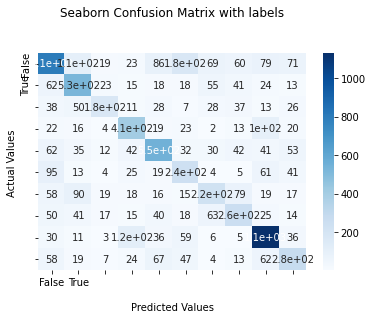

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

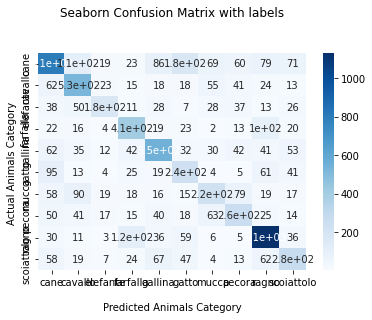

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Animals Category')
ax.set_ylabel('Actual Animals Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo"])
ax.yaxis.set_ticklabels(["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo"])

## Display the visualization of the Confusion Matrix.
# plt.figure(figsize = (100,100))
# sns.set(font_scale=1.4) # for label size
plt.show()

In [ ]:
# plot_confusion_matrix(model,X =test_generator.classes, y_true = y_pred, labels = CATEGORIES, normalize=False)

Show first 5 correctly identified test images with predicted labels


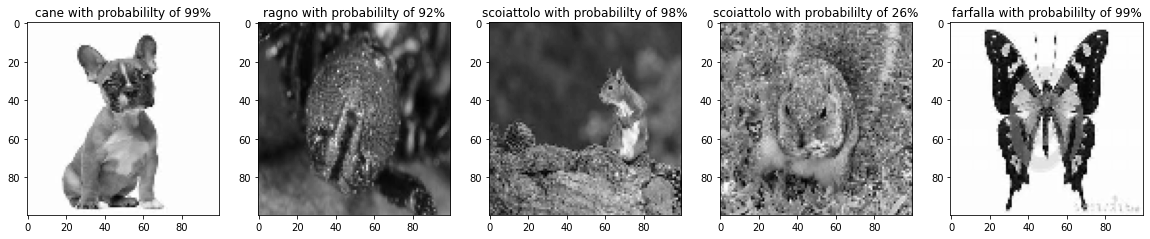

In [ ]:
# show first 5 correctly identified test images with predicted labels and probabilities
fig, ax = plt.subplots(1,5,figsize=(20,20))

class_names = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo"]

print("Show first 5 correctly identified test images with predicted labels")

for i, correct_idx in enumerate(correct_indices[:5]):
    ax[i].imshow(X_test[correct_idx].reshape(100,100),cmap='gray')
    ax[i].set_title("{} with probabililty of {}%".format(class_names[y_pred[correct_idx]], int(max(y_proba[correct_idx])*100)))

Showing first 5 incorrectly identified test images with predicted labels


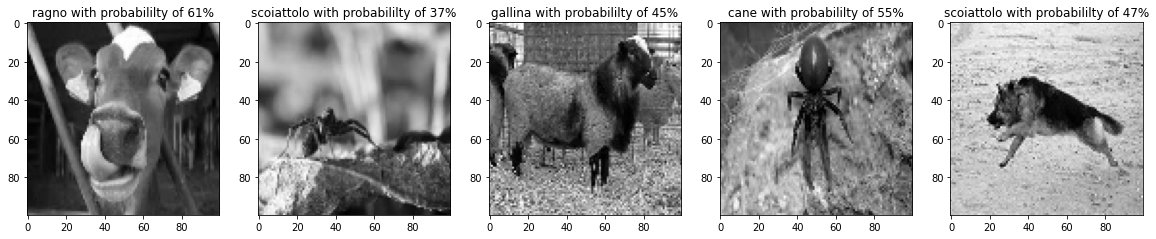

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
print("Showing first 5 incorrectly identified test images with predicted labels")

for i, incorrect_idx in enumerate(incorrect_indices[:5]):
    ax[i].imshow(X_test[incorrect_idx].reshape(100,100),cmap='gray')
    ax[i].set_title("{} with probabililty of {}%".format(class_names[y_pred[incorrect_idx]], int(max(y_proba[incorrect_idx])*100)))



In [ ]:
#create a function to make predictions
#return a dictionary of labels and probabilities
def cat_or_dog(img):
    img = img.reshape(1, 100, 100, 1)
    prediction = model.predict(img).tolist()[0]
    class_names = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora","ragno", "scoiattolo"]
    return {class_names[i]: prediction[i] for i in range(10)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(100, 100), image_mode='L', invert_colors=False, source="upload")

#setup the interface
iface = gr.Interface(
    fn = cat_or_dog, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)


/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://34418.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f171ed21a10>,
 'http://127.0.0.1:7860/',
 'https://34418.gradio.app')

In [ ]:
!pip3 install nbconvert 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%shell
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Artificial_Intelligence_CW.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Artificial_Intelligence_CW.ipynb to html
[NbConvertApp] Writing 1097592 bytes to /content/drive/MyDrive/Colab Notebooks/Artificial_Intelligence_CW.html
